In [33]:
from datasets import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Using Synthetic Data from Hybrid ODE (Zhi Cao)

In [34]:
def get_month_from_week(year, week_no):
    start_of_year = datetime.date(year, 1, 1)
    week_start_date = start_of_year + datetime.timedelta(weeks=week_no)
    return week_start_date.strftime("%B")


C:\Users\prana\AppData\Local\Temp\ipykernel_25548\1529625770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_cols_df['Hospitalized_Total'] = rel_cols_df['Hospitalized_recovered'] + rel_cols_df['Hospitalized_deceased']
C:\Users\prana\AppData\Local\Temp\ipykernel_25548\1529625770.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_cols_df['Month'] = pd.Series([get_month_from_week(start_year+rel_cols_df['time'][i]//52, int(rel_cols_df['time'][i]%52)) for i in rel_cols_df['time']])
C:\Users\prana\A

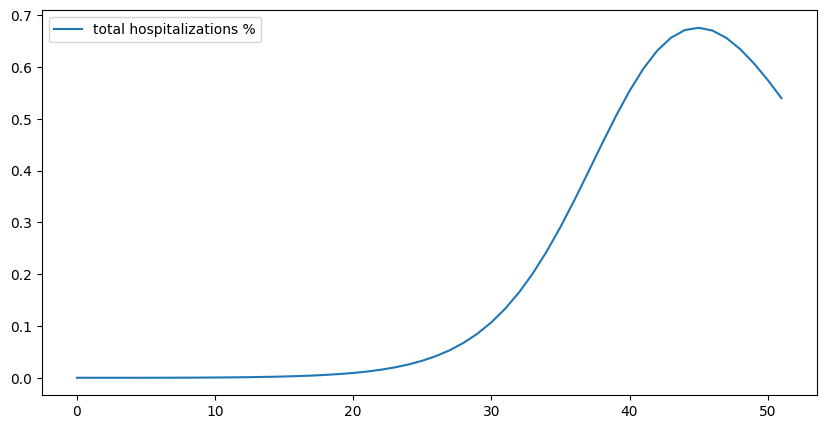

In [35]:
# Read data from ODE csv file
weekly_df = pd.read_csv("./hybridODE_weekly_data.csv")
rel_cols_df = weekly_df[["time", "beta", "Ca", "Hospitalized_recovered", "Hospitalized_deceased"]]

# Add total hospitalizations col
rel_cols_df['Hospitalized_Total'] = rel_cols_df['Hospitalized_recovered'] + rel_cols_df['Hospitalized_deceased']

# Add Month and Year cols, assuming time = 0 is January 1, 2024
start_year = 2024
rel_cols_df['Month'] = pd.Series([get_month_from_week(start_year+rel_cols_df['time'][i]//52, int(rel_cols_df['time'][i]%52)) for i in rel_cols_df['time']])
rel_cols_df['Year'] = pd.Series([start_year+rel_cols_df['time'][i]//52 for i in rel_cols_df['time']])

# Create start and end weeks
start = 0
timesteps = 52
end = start + timesteps

# Optionally normalize hospitalizations
# norm_hosp = rel_cols_df["Hospitalized_Total"][start:end]/rel_cols_df["Hospitalized_Total"][start:end].sum()

# Plot hospitalizations
plt.figure(figsize=(10, 5))
plt.plot(rel_cols_df["time"][start:end], rel_cols_df['Hospitalized_Total'][start:end], label="total hospitalizations %")
plt.legend()
plt.show()

In [36]:
# Get data based on month and year
month, year = 'January', 2024
yearly_data = rel_cols_df[rel_cols_df['Year'] == year]
monthly_data = yearly_data[yearly_data['Month'] == month]

monthly_data


,time,beta,Ca,Hospitalized_recovered,Hospitalized_deceased,Hospitalized_Total,Month,Year
0,0,0.500000,0.425,0.000171,0.000170,0.000341,January,2024
1,1,0.500000,0.425,0.000151,0.000155,0.000306,January,2024
2,2,0.500000,0.425,0.000135,0.000154,0.000289,January,2024
3,3,0.480491,0.425,0.000123,0.000165,0.000288,January,2024
4,4,0.448007,0.425,0.000115,0.000186,0.000301,January,2024
